In [0]:

from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,\
    GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
    !pip install -U -q PyDrive ## you will have install for every colab session

     from pydrive.auth import GoogleAuth
     from pydrive.drive import GoogleDrive
    from google.colab import auth
     from oauth2client.client import GoogleCredentials

IndentationError: ignored

In [3]:
df=pd.read_csv('songs.csv')
df=shuffle(df)

NameError: ignored

In [1]:
#df.info()
df.info()


NameError: ignored

In [0]:
df=df.drop((df[(df['Target']==0) & (df['Artist']=='Radiohead')].index))
#df.head()

In [0]:
df.drop(df.query('Target == 0').sample(frac=.6).index, inplace=True)

In [0]:
df.Target.value_counts(normalize=True)

0    0.552778
1    0.447222
Name: Target, dtype: float64

In [0]:
def report(y, y_pred, classes):
    acc = accuracy_score(y, y_pred)
                        
    cm = pd.DataFrame(confusion_matrix(y, y_pred), 
                      index=classes, 
                      columns=classes)
    rep = classification_report(y, y_pred)

    
    return '{:.3f}\n\n{}\n\n{}'.format(acc, cm, rep)

In [0]:
cols=['Artist','TrackName','acousticness','acousticness','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence','Target']
#,'popularity'
df1=df.drop(df.columns.difference(cols), 1)


In [0]:
df1[df1.columns[:-1]].head()
df1['Target'].head()
#df1[df1.drop('Artist','TrackName','Target'))].head()
dfplot=df1[df1.columns.difference(['Artist','TrackName','Target'])]

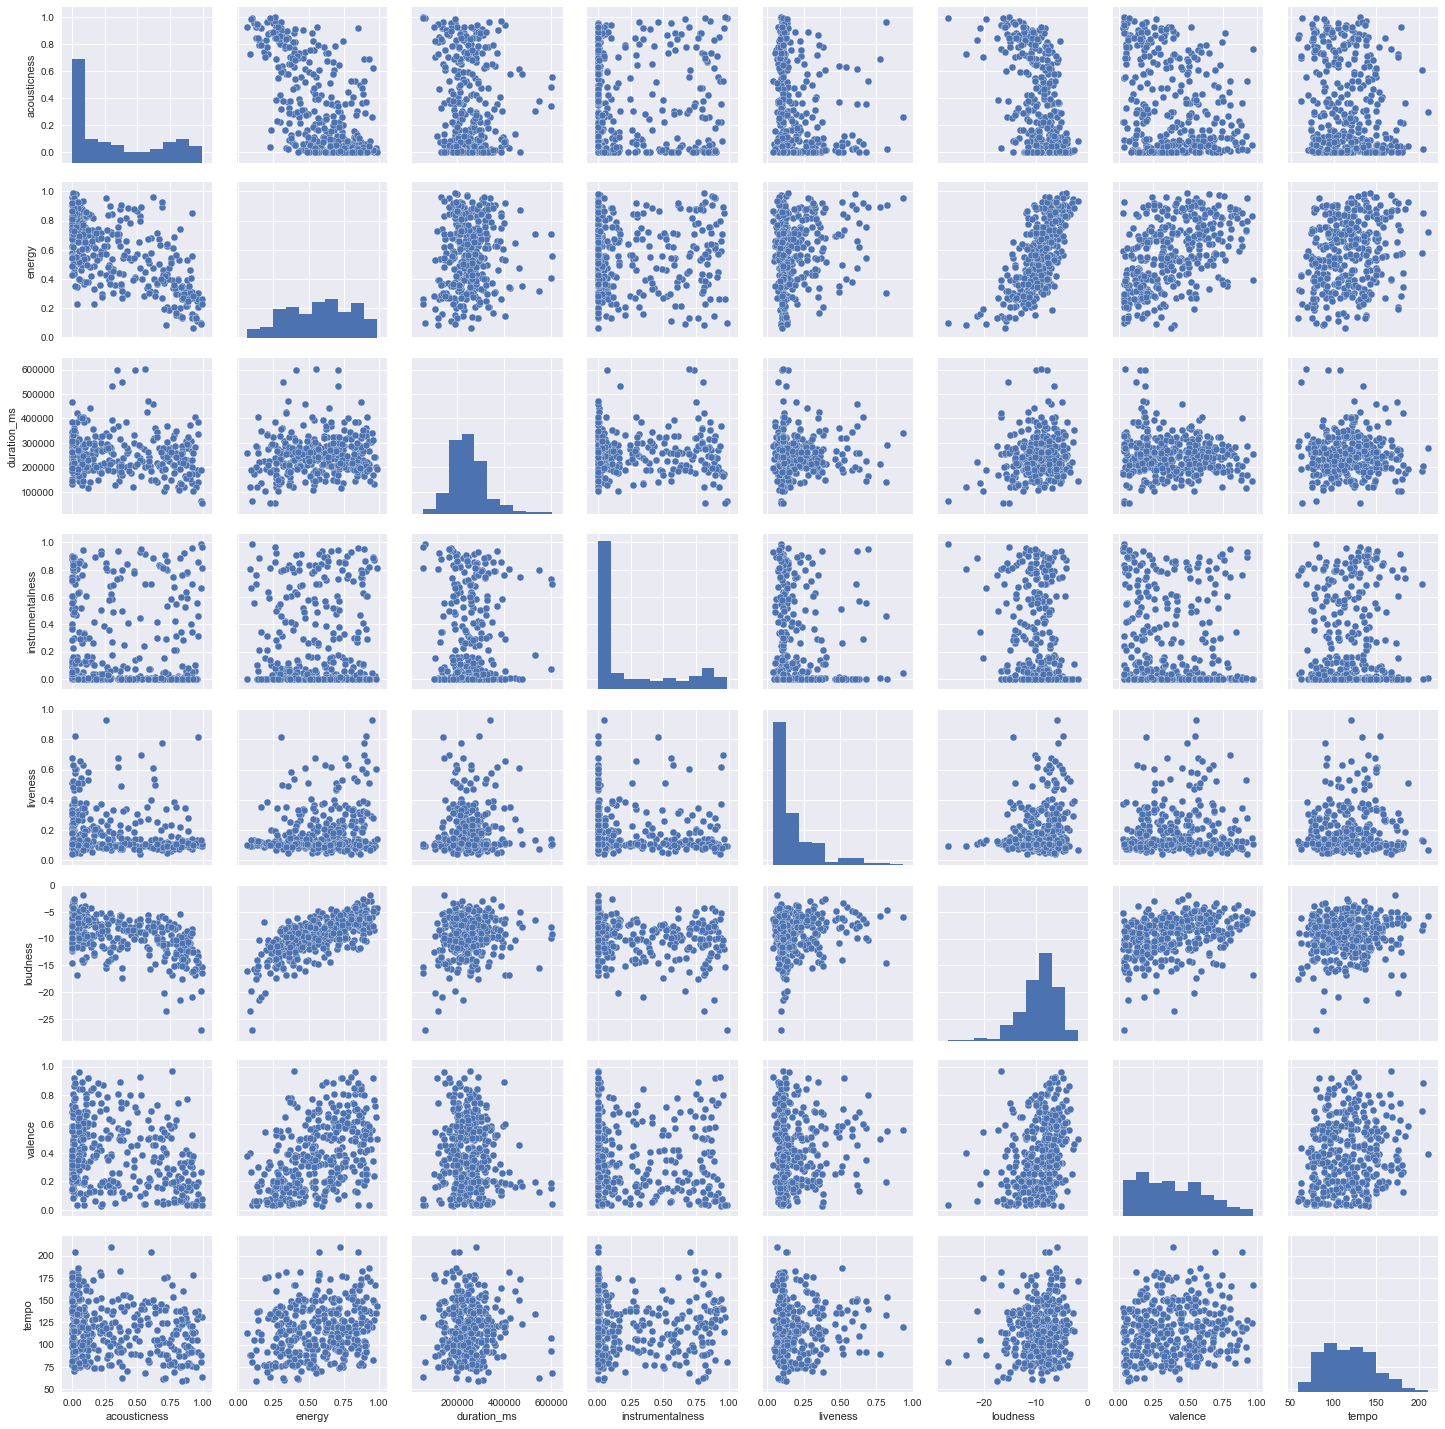

In [0]:
sns.pairplot(dfplot[['acousticness','energy','duration_ms','instrumentalness','liveness','loudness','valence','tempo']])

In [0]:
dfplot.corr()

,acousticness,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
acousticness,1.000000,-0.110701,-0.649000,0.089524,-0.057676,-0.179907,-0.529273,0.088632,-0.163780,-0.194204,-0.101541,-0.312269
duration_ms,-0.110701,1.000000,0.080505,0.092683,0.065166,0.043545,0.135706,-0.130198,-0.087577,-0.014005,0.109060,-0.108360
energy,-0.649000,0.080505,1.000000,-0.003139,-0.026514,0.246980,0.710513,-0.086298,0.251196,0.217207,0.085820,0.471750
instrumentalness,0.089524,0.092683,-0.003139,1.000000,-0.003979,-0.060139,-0.277890,-0.050783,-0.188995,0.061320,-0.053382,-0.159774
key,-0.057676,0.065166,-0.026514,-0.003979,1.000000,-0.081369,0.044392,-0.198102,-0.048806,-0.029052,0.020658,0.019432
liveness,-0.179907,0.043545,0.246980,-0.060139,-0.081369,1.000000,0.190526,-0.025976,0.250542,0.075250,0.003125,0.120468
loudness,-0.529273,0.135706,0.710513,-0.277890,0.044392,0.190526,1.000000,-0.084970,0.196674,0.135908,0.075420,0.328368
mode,0.088632,-0.130198,-0.086298,-0.050783,-0.198102,-0.025976,-0.084970,1.000000,0.011547,-0.015551,-0.036134,-0.036336
speechiness,-0.163780,-0.087577,0.251196,-0.188995,-0.048806,0.250542,0.196674,0.011547,1.000000,0.120617,0.054266,0.246953
tempo,-0.194204,-0.014005,0.217207,0.061320,-0.029052,0.075250,0.135908,-0.015551,0.120617,1.000000,-0.136068,0.117129


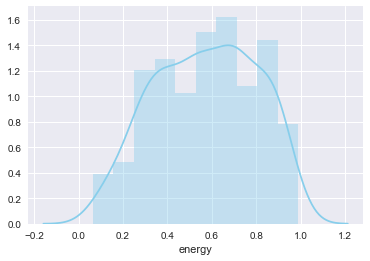

In [0]:
sns.distplot( df1["energy"] , color="skyblue", label="Energy")
#


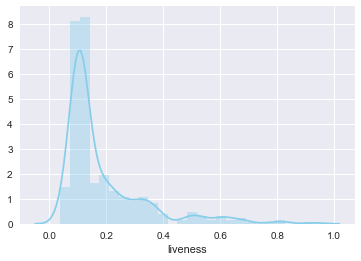

In [0]:
sns.distplot( df1["liveness"] , color="skyblue", label="liveness")

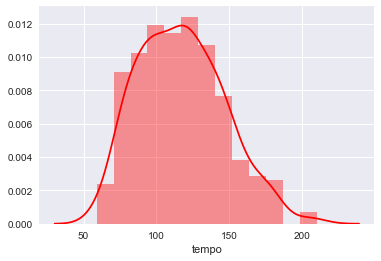

In [0]:
sns.distplot( df1["tempo"] , color="red", label="tempo")

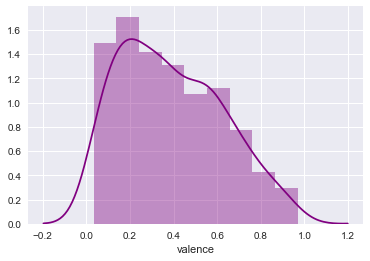

In [0]:
sns.distplot( df1["valence"] , color="purple", label="valence")

In [0]:
df1['loudness'].describe()

count    360.000000
mean      -9.339278
std        3.494726
min      -27.010000
25%      -11.215250
50%       -8.783000
75%       -6.987250
max       -1.957000
Name: loudness, dtype: float64

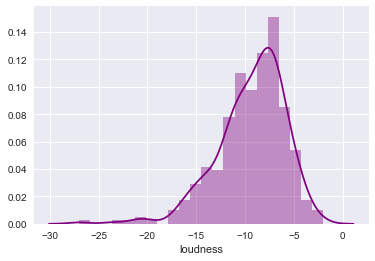

In [0]:
sns.distplot( df1["loudness"] , color="purple", label="loudness")

In [0]:
df1 = pd.get_dummies(df1,columns=['key','time_signature'])
df1.head()

,acousticness,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
18,0.9430,404400,0.143,0.059600,0.111,-16.767,0,0.0390,114.672,0.180,...,0,1,0,0,0,0,0,1,0,0
106,0.7230,276280,0.210,0.000033,0.119,-11.004,1,0.0337,175.647,0.297,...,0,0,0,0,0,0,0,0,1,0
47,0.8140,237733,0.401,0.018000,0.107,-7.856,0,0.0333,117.985,0.208,...,0,0,0,0,0,0,0,0,1,0
424,0.0161,235373,0.696,0.001830,0.465,-6.465,1,0.0555,123.475,0.254,...,0,0,1,0,0,0,0,0,1,0
170,0.1500,262107,0.737,0.159000,0.122,-6.332,1,0.0624,128.015,0.441,...,0,1,0,0,0,0,0,0,1,0


In [0]:
scaler = MinMaxScaler().fit(dfplot['loudness'].reshape(-1, 1))
df['loudness']=scaler.transform(df['loudness'].reshape(-1, 1) )                        
#X = scaler.transform(df['loudness'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [0]:
scaler = MinMaxScaler().fit(dfplot['tempo'].reshape(-1, 1))
df['tempo']=scaler.transform(df['tempo'].reshape(-1, 1) )   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


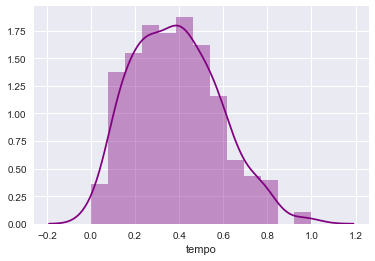

In [0]:
sns.distplot( df["tempo"] , color="purple", label="loudness")

In [0]:
Xradiohead_train, Xradiohead_test , y_train,y_test = split(df1.drop('Target',1),df1['Target'] ,test_size=0.3, random_state=12345)
Xradiohead_train=Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])]
Xradiohead_test=Xradiohead_test[Xradiohead_test.columns.difference(['Artist','TrackName'])]


In [0]:
df.time_signature.value_counts()

4    311
3     37
5     10
1      2
Name: time_signature, dtype: int64

# Naive Baise 

In [0]:
GNB= GaussianNB().fit(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName','Target'])], y_train)
y_train_pred=GNB.predict(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])])

print( report(y_train,y_train_pred, ['Not Radiohead','Radiohead']))


0.643

               Not Radiohead  Radiohead
Not Radiohead            114         29
Radiohead                 61         48

             precision    recall  f1-score   support

          0       0.65      0.80      0.72       143
          1       0.62      0.44      0.52       109

avg / total       0.64      0.64      0.63       252



In [0]:
y_test_pred=GNB.predict(Xradiohead_test[Xradiohead_test.columns.difference(['Artist','TrackName'])])
print( report(y_test,y_test_pred, ['Not Radiohead','Radiohead']))


0.657

               Not Radiohead  Radiohead
Not Radiohead             48          8
Radiohead                 29         23

             precision    recall  f1-score   support

          0       0.62      0.86      0.72        56
          1       0.74      0.44      0.55        52

avg / total       0.68      0.66      0.64       108



In [0]:
cls=SVC().fit(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName','Target'])], y_train)
y_train_pred=GNB.predict(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])])

print( report(y_train,y_train_pred, ['Not Radiohead','Radiohead']))

0.643

               Not Radiohead  Radiohead
Not Radiohead            114         29
Radiohead                 61         48

             precision    recall  f1-score   support

          0       0.65      0.80      0.72       143
          1       0.62      0.44      0.52       109

avg / total       0.64      0.64      0.63       252



In [0]:
y_test_pred=cls.predict(Xradiohead_test[Xradiohead_test.columns.difference(['Artist','TrackName'])])
print( report(y_test,y_test_pred, ['Not Radiohead','Radiohead']))

0.519

               Not Radiohead  Radiohead
Not Radiohead             56          0
Radiohead                 52          0

             precision    recall  f1-score   support

          0       0.52      1.00      0.68        56
          1       0.00      0.00      0.00        52

avg / total       0.27      0.52      0.35       108



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistics Regrssion

In [0]:
clf = LogisticRegression().fit(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName','Target'])], y_train)
y_train_pred=clf.predict(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])])
print( report(y_train,y_train_pred, ['Not Radiohead','Radiohead']))



0.587

               Not Radiohead  Radiohead
Not Radiohead            133         13
Radiohead                 91         15

             precision    recall  f1-score   support

          0       0.59      0.91      0.72       146
          1       0.54      0.14      0.22       106

avg / total       0.57      0.59      0.51       252



In [0]:
y_test_pred=clf.predict(Xradiohead_test[Xradiohead_test.columns.difference(['Artist','TrackName'])])
print( report(y_test,y_test_pred, ['Not Radiohead','Radiohead']))


0.528

               Not Radiohead  Radiohead
Not Radiohead             48          5
Radiohead                 46          9

             precision    recall  f1-score   support

          0       0.51      0.91      0.65        53
          1       0.64      0.16      0.26        55

avg / total       0.58      0.53      0.45       108



# KNN

In [0]:
clf= KNeighborsClassifier(n_neighbors=2,metric='cosine').fit(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName','Target'])], y_train)

y_train_pred=clf.predict(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])])

print( report(y_train,y_train_pred, ['Not Radiohead','Radiohead']))


0.754

               Not Radiohead  Radiohead
Not Radiohead            143          0
Radiohead                 62         47

             precision    recall  f1-score   support

          0       0.70      1.00      0.82       143
          1       1.00      0.43      0.60       109

avg / total       0.83      0.75      0.73       252



In [0]:

y_test_pred=clf.predict(Xradiohead_test[Xradiohead_test.columns.difference(['Artist','TrackName'])])

print( report(y_test,y_test_pred, ['Not Radiohead','Radiohead']))


0.556

               Not Radiohead  Radiohead
Not Radiohead             45         11
Radiohead                 37         15

             precision    recall  f1-score   support

          0       0.55      0.80      0.65        56
          1       0.58      0.29      0.38        52

avg / total       0.56      0.56      0.52       108



In [0]:
params = {'n_neighbors': [2,5,7,8,11],#range(5, 9),
          'metric': ['cosine','manhattan','minkowski']#range(1, 5),
          }
gs = GridSearchCV(clf, param_grid=params)
gs.fit(Xradiohead_train, y_train)

gs.best_estimator_.score

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')>

# DecisionTree

In [0]:
clf = DecisionTreeClassifier(max_depth=5,
                                   min_samples_split=15,
                                   min_samples_leaf=5).fit(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName','Target'])], y_train)

y_train_pred=clf.predict(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])])
print( report(y_train,y_train_pred, ['Not Radiohead','Radiohead']))

y_train.value_counts()

0.873

               Not Radiohead  Radiohead
Not Radiohead            130         13
Radiohead                 19         90

             precision    recall  f1-score   support

          0       0.87      0.91      0.89       143
          1       0.87      0.83      0.85       109

avg / total       0.87      0.87      0.87       252



0    143
1    109
Name: Target, dtype: int64

In [0]:
clf = DecisionTreeClassifier(max_depth=5,
                                   min_samples_split=10,
                                   min_samples_leaf=10).fit(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName','Target'])], y_train)

y_train_pred=clf.predict(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])])
print( report(y_train,y_train_pred, ['Not Radiohead','Radiohead']))

y_train.value_counts()

0.845

               Not Radiohead  Radiohead
Not Radiohead            117         26
Radiohead                 13         96

             precision    recall  f1-score   support

          0       0.90      0.82      0.86       143
          1       0.79      0.88      0.83       109

avg / total       0.85      0.85      0.85       252



0    143
1    109
Name: Target, dtype: int64

In [0]:
y_test_pred=clf.predict(Xradiohead_test[Xradiohead_test.columns.difference(['Artist','TrackName'])])
print( report(y_test,y_test_pred, ['Not Radiohead','Radiohead']))


0.694

               Not Radiohead  Radiohead
Not Radiohead             43         13
Radiohead                 20         32

             precision    recall  f1-score   support

          0       0.68      0.77      0.72        56
          1       0.71      0.62      0.66        52

avg / total       0.70      0.69      0.69       108



In [0]:
params = {'max_depth': [2,5,8],#range(5, 9),
          #'metric': ['cosine','manhattan','minkowski'] ,#range(1, 5),
          'min_samples_split': [5,10,15],
          'min_samples_leaf' : [5,10,15],
          'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3]
          }
gs = GridSearchCV(clf, 'param_grid'=params)
gs.fit(Xradiohead_train, y_train)

gs.best_estimator_.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [0]:
Xradiohead_test.columns.difference(['Artist','TrackName'])

Index(['acousticness', 'duration_ms', 'energy', 'instrumentalness', 'key_0',
       'key_1', 'key_10', 'key_11', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'valence'],
      dtype='object')

In [0]:
#Xradiohead_test['target']=y_test
#Xradiohead_test['pred']=y_test_pred
#len((Xradiohead_test[Xradiohead_test['target']!=Xradiohead_test['pred']]))

29

In [0]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# RandomTreeForest

In [0]:
clf = RandomForestClassifier(max_depth=5, max_features=1,  n_estimators =1,min_samples_split=10,
                                   min_samples_leaf=10 )
clf = clf.fit(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])], y_train)
y_train_pred=clf.predict(Xradiohead_train[Xradiohead_train.columns.difference(['Artist','TrackName'])])
print( 'Train\n accuracy:',report(y_train,y_train_pred, ['Not Radiohead','Radiohead']))


Train
 accuracy: 0.738

               Not Radiohead  Radiohead
Not Radiohead            103         43
Radiohead                 23         83

             precision    recall  f1-score   support

          0       0.82      0.71      0.76       146
          1       0.66      0.78      0.72       106

avg / total       0.75      0.74      0.74       252



In [0]:
y_test_pred=clf.predict(Xradiohead_test[Xradiohead_test.columns.difference(['Artist','TrackName'])])
print( report(y_test,y_test_pred, ['Not Radiohead','Radiohead']))

#Xradiohead_test['target']=y_test
#Xradiohead_test['pred']=y_test_pred


ValueError: Number of features of the model must match the input. Model n_features is 26 and input n_features is 28 

In [0]:
Xradiohead_test['target']=y_test
Xradiohead_test['pred']=y_test_pred
(Xradiohead_test[Xradiohead_test['target']!=Xradiohead_test['pred']])

,acousticness,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,target,pred
539,0.315000,356333,0.302,0.790000,0.1100,-11.645,0,0.0344,102.041,0.2050,...,0,0,0,0,0,0,1,0,1,0
580,0.105000,248893,0.833,0.004190,0.0741,-6.082,0,0.0481,165.635,0.8080,...,0,0,0,1,0,0,1,0,1,0
135,0.053300,244186,0.528,0.022100,0.1010,-8.253,1,0.0608,149.852,0.4250,...,0,0,0,0,0,0,1,0,0,1
276,0.889000,217053,0.327,0.057600,0.2810,-10.974,1,0.0309,91.016,0.2040,...,0,0,0,0,0,0,1,0,0,1
648,0.920000,266478,0.307,0.000744,0.1120,-8.236,1,0.0296,75.807,0.3040,...,0,0,0,0,0,0,1,0,1,0
624,0.756000,149027,0.532,0.000451,0.1640,-9.383,1,0.0305,106.720,0.1860,...,0,0,0,0,0,0,1,0,1,0
579,0.278000,328293,0.496,0.581000,0.1010,-9.638,1,0.0297,111.662,0.6370,...,0,0,0,0,0,0,1,0,1,0
393,0.000112,318880,0.699,0.515000,0.5090,-7.861,0,0.0539,136.023,0.2630,...,0,0,0,1,0,0,1,0,0,1
652,0.474000,331747,0.882,0.775000,0.1860,-10.114,1,0.0501,131.111,0.3510,...,0,0,0,0,0,0,1,0,1,0
370,0.922000,316800,0.249,0.597000,0.1120,-12.812,1,0.0323,128.171,0.0507,...,0,1,0,0,0,0,1,0,0,1


In [0]:
(pd.Series(clf.feature_importances_, index=Xradiohead_test.columns)
   .nlargest(8)
   .plot(kind='barh'))  

ValueError: Wrong number of items passed 26, placement implies 30

In [0]:
from google.colab import drive
drive.mount('/naya')

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

ModuleNotFoundError: ignored